In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from statistics import NormalDist

In [2]:
df = pd.read_csv('scores.csv')
df.tournament.unique()

# FIXME: ensure that 'Adjudicator X' names are not unintenionally merged between tournaments

array(['wudc2023', 'wudc2024', 'wudc2025', 'stockholmopen2025',
       'wudc2020'], dtype=object)

In [3]:
by_adj = df.groupby('adj')

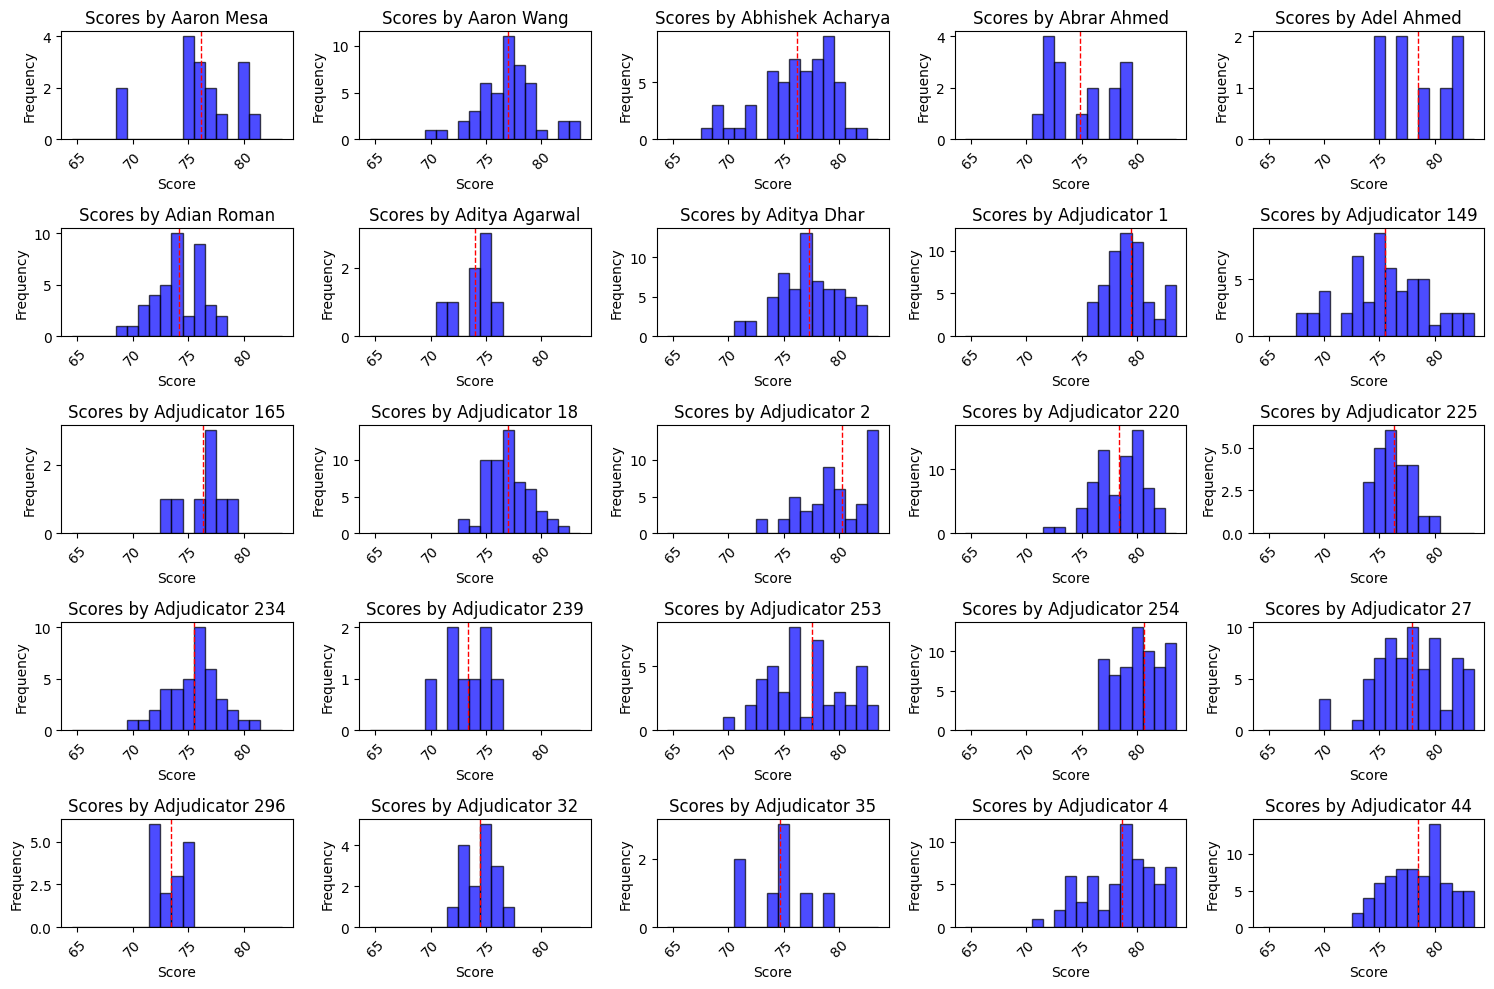

In [4]:
bp_bins = np.arange(65, 85, 1)

n = 5
# Group by adjudicator and plot histogram of scores
fig, axs = plt.subplots(n, n, figsize=(15, 10))
axs = axs.ravel() # Flatten the 2D array of axes for easy iteration

# Group by adjudicator
grouped_by_adj = df.groupby('adj')

for i, (judge, group) in enumerate(grouped_by_adj):
    if i >= len(axs):
        break
    
    ax = axs[i]
    ax.hist(group['score'], alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
    ax.axvline(group['score'].mean(), color='red', linestyle='dashed', linewidth=1)
    ax.set_title(f'Scores by {judge}')
    # ax.set_xticks(bp_bins)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

(np.float64(76.20430300572806), np.float64(2.211741975598639))

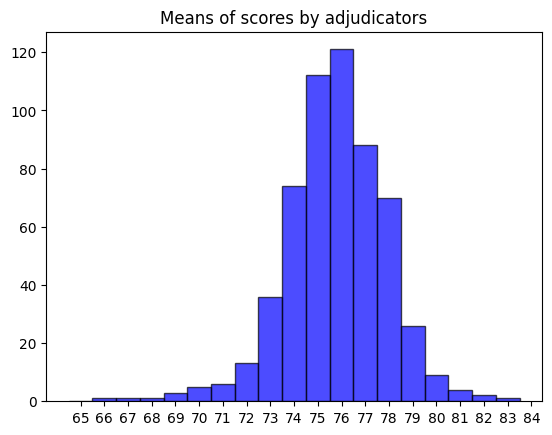

In [5]:
means = by_adj['score'].mean()
plt.hist(means, alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
plt.title('Means of scores by adjudicators')
plt.xticks(bp_bins)
plt.plot()

means.mean(), means.std()

In [6]:
aggregate = by_adj['score'].aggregate(['mean', 'std', 'count'])
aggregate

,mean,std,count
adj,,,
Aaron Mesa,76.187500,3.468309,16
Aaron Wang,76.958333,2.673418,48
Abhishek Acharya,76.160714,3.312658,56
Abrar Ahmed,74.875000,2.963669,16
Adel Ahmed,78.500000,2.927700,8
...,...,...,...
Yuto Kimura,72.875000,4.882549,8
Zach Godley-McAvoy,74.259615,3.494782,104
Ziggy O’Shea,74.750000,2.764572,8


In [7]:
def z(x, mean, std):
    return (x - mean) / std

def unz(x, mean, std):
    return (x * std) + mean

df['z'] = df.apply(lambda row: z(row['score'], means[row['adj']], aggregate.loc[row['adj']]['std']), axis=1)
df['new'] = df.apply(lambda row: unz(row['z'], 75, 5.3), axis=1)
df.sort_values('new', ascending=False).where(df['round'] == 2).where(df['adj'] == 'Laura Serafine Pilmark').dropna()

KeyError: nan

24


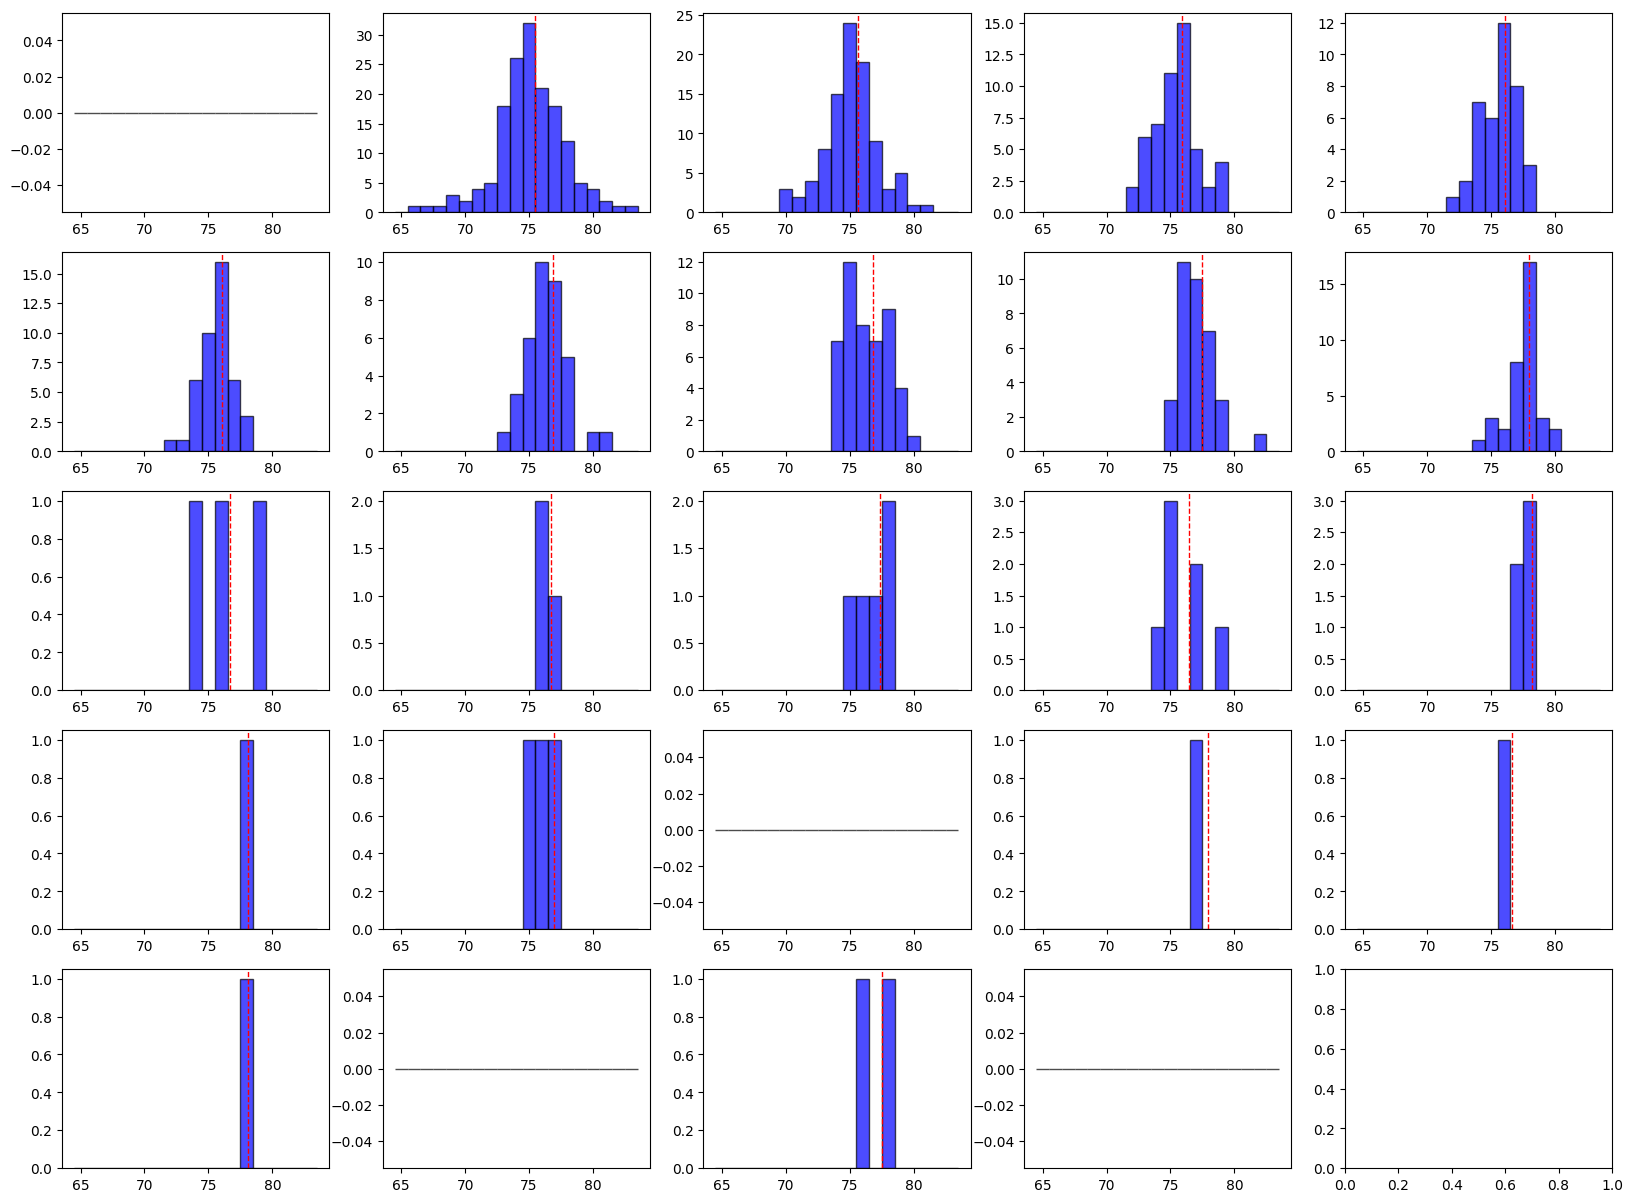

In [ ]:
means = by_adj['score'].mean()
counts = by_adj['score'].count()

n = counts.max() // 8
sqrt = int(np.sqrt(n) + 1) 

fig, axs = plt.subplots(sqrt , sqrt, figsize=(20, 15))
axs = axs.ravel() # Flatten the 2D array of axes for easy iteration

print(n)

for i in range(n):
    mask = (counts >= i * 8) & (counts < (i + 1) * 8)
    cutoff = means[mask]

    ax = axs[i]
    ax.hist(cutoff, alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
    ax.axvline(cutoff.mean(), color='red', linestyle='dashed', linewidth=1)
    ax.plot()


(np.float64(2.5753124590498158), np.float64(0.9370049744952709))

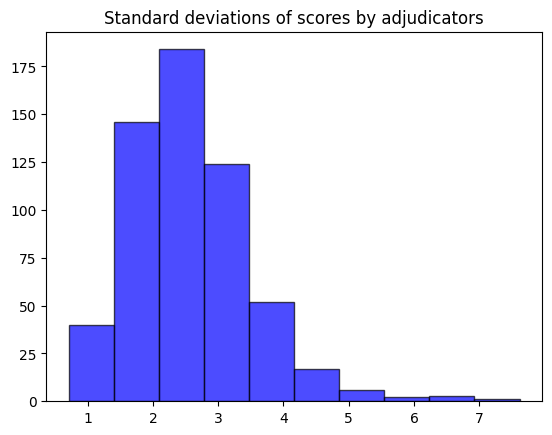

In [ ]:
stds = by_adj['score'].std()
plt.title('Standard deviations of scores by adjudicators')
plt.hist(stds, alpha=0.7, color='blue', edgecolor='black')
plt.plot()

stds.mean(), stds.std()

[]

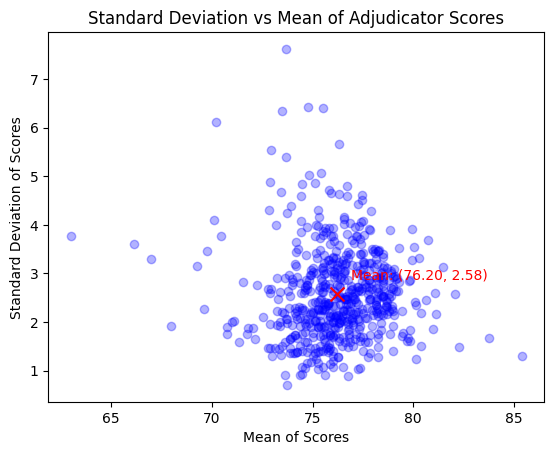

In [ ]:
plt.scatter(means, stds, alpha=0.3, color='blue')
plt.xlabel('Mean of Scores')
plt.ylabel('Standard Deviation of Scores')
# Calculate the mean of means and mean of standard deviations
mean_of_means = means.mean()
mean_of_stds = stds.mean()
# Add a cross marker at the mean point
plt.scatter(mean_of_means, mean_of_stds, color='red', marker='x', s=100)
# Add text annotation
plt.annotate(f'Mean: ({mean_of_means:.2f}, {mean_of_stds:.2f})', 
             (mean_of_means, mean_of_stds),
             xytext=(10, 10),
             textcoords='offset points',
             color='red')
plt.title('Standard Deviation vs Mean of Adjudicator Scores')

plt.plot()

In [8]:
aggregate = by_adj['score'].aggregate(['mean', 'std', 'count'])
px.scatter(aggregate, x='mean', y='std', hover_name=aggregate.index, size=aggregate['count'], title='Standard deviation vs mean of scores by adjudicators', height=800 )

## A bunch of PCAs / correlations

### Judge experience vs means

In [144]:
aggregate

,mean,std,count
adj,,,
Aaron Mesa,76.187500,3.468309,16
Aaron Wang,76.958333,2.673418,48
Abhishek Acharya,76.160714,3.312658,56
Abrar Ahmed,74.875000,2.963669,16
Adel Ahmed,78.500000,2.927700,8
...,...,...,...
Yuto Kimura,72.875000,4.882549,8
Zach Godley-McAvoy,74.259615,3.494782,104
Ziggy O’Shea,74.750000,2.764572,8


In [142]:
px.scatter(aggregate, trendline='lowess', x='count', y='mean', hover_name=aggregate.index).show()


[]

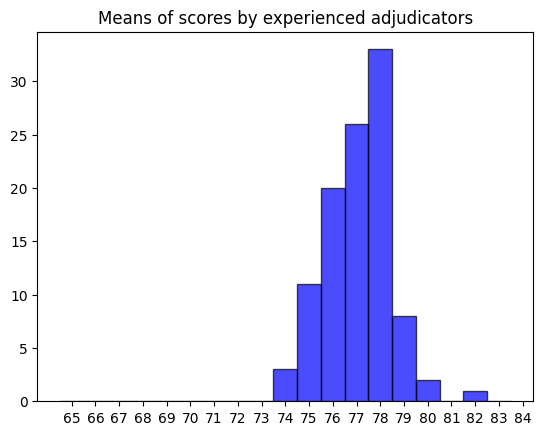

In [165]:
means = aggregate[aggregate['count'] > 60]['mean']
plt.hist(means, alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
plt.title('Means of scores by experienced adjudicators')
plt.xticks(bp_bins)
plt.plot()

[]

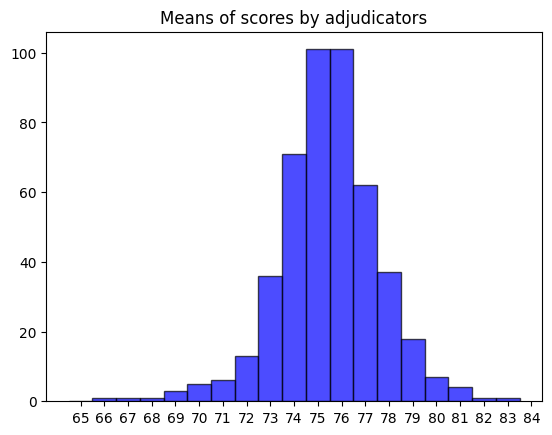

In [159]:
means = aggregate[aggregate['count'] < 60]['mean']
plt.hist(means, alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
plt.title('Means of scores by adjudicators')
plt.xticks(bp_bins)
plt.plot()

[]

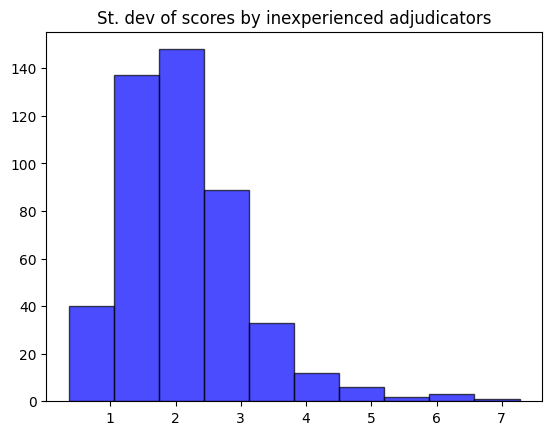

In [170]:
means = aggregate[aggregate['count'] < 60]['std']
plt.hist(means, alpha=0.7, color='blue',  align='left', edgecolor='black')
plt.title('St. dev of scores by inexperienced adjudicators')
plt.plot()

[]

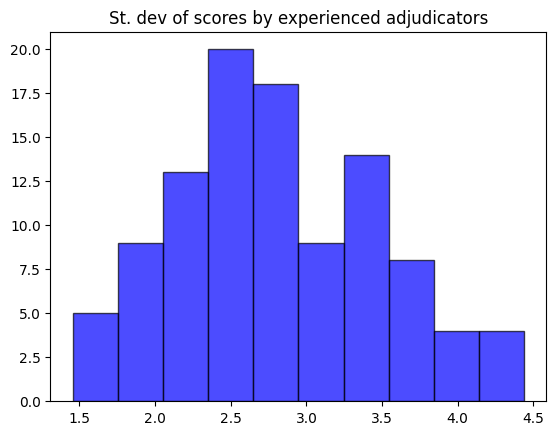

In [171]:
means = aggregate[aggregate['count'] > 60]['std']
plt.hist(means, alpha=0.7, color='blue',  align='left', edgecolor='black')
plt.title('St. dev of scores by experienced adjudicators')
plt.plot()

In [180]:
df[df['adj'] == 'Aaron Mesa']['score'].mean()

np.float64(76.1875)

In [357]:
df[df['adj'] == 'Sarah Mackenzie']

,tournament,round,score,speaker,adj
18310,wudc2020,7,73.0,Veronica Minesso,Sarah Mackenzie
18309,wudc2020,7,76.0,Viren Beruwalage,Sarah Mackenzie
18304,wudc2020,7,77.0,Do Chau Giang,Sarah Mackenzie
18305,wudc2020,7,77.0,Masachika Onishi,Sarah Mackenzie
18306,wudc2020,7,74.0,Giselle Huang,Sarah Mackenzie
18307,wudc2020,7,74.0,Holden Lee,Sarah Mackenzie
18308,wudc2020,7,76.0,Mac Cheminais,Sarah Mackenzie
18311,wudc2020,7,73.0,Zvonimir Kuzmanic,Sarah Mackenzie


## Grouped scores

(np.float64(76.79091726618705), np.float64(2.6550773837280537))

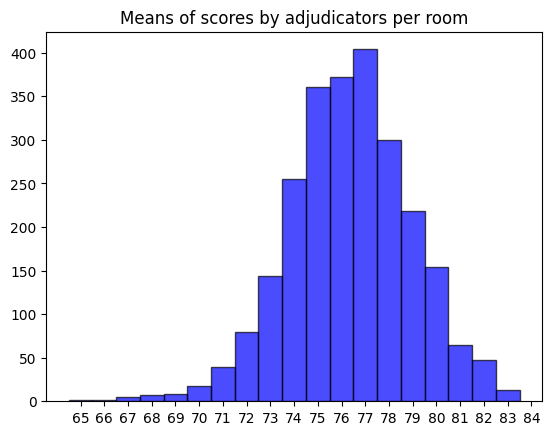

In [264]:
# group by tournament, round, judge -> get mean of this and plot
by_room = df.groupby(['tournament', 'round', 'adj'])
by_room_agg = by_room['score'].aggregate(['mean', 'std', 'count'])

plt.hist(by_room_agg['mean'], alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
plt.title('Means of scores by adjudicators per room')
plt.xticks(bp_bins)
plt.plot()

by_room_agg['mean'].mean(), by_room_agg['mean'].std()

In [363]:
by_room_agg

mean       std  count
tournament        round adj                                            
stockholmopen2025 1     Adian Roman             74.250  1.669046      8
                        Andrew Mabon            74.125  2.167124      8
                        Daryna Ivanitska        73.125  2.416461      8
                        Laura Serafine Pilmark  74.375  2.503569      8
                  2     Adian Roman             72.625  2.133910      8
...                                                ...       ...    ...
wudc2025          9     Vladimira Šuflaj        75.875  1.642081      8
                        Xiao-ke Lu              78.250  2.549510      8
                        Zach Godley-McAvoy      80.000  2.267787      8
                        minami matsushima       77.125  3.796145      8
                        Ðorđe Radosavljević     82.375  2.065879      8

[2502 rows x 3 columns]

In [ ]:
def prob(x, mu, sigma):
    p = NormalDist(mu, sigma).cdf(x)

    if p > 0.5:
        p = 1 - p

    return p

prob(82.06, 75, 5.3)

0.09141769474844197

In [314]:

from scipy.stats import binom
from scipy.stats import chi2

In [335]:
def fishers_method(p_values):
    """
    Combine p-values using Fisher's method
    
    Parameters:
    p_values: array-like of p-values
    
    Returns:
    combined_p: The combined p-value
    """
    # Filter out any NaN or invalid p-values
    valid_p = [p for p in p_values if p is not None and not np.isnan(p) and 0 < p <= 1]
    
    if not valid_p:
        return None
    
    # Calculate the test statistic
    chi_square = -2 * np.sum(np.log(valid_p))
    
    # Calculate the combined p-value (chi-square with 2k degrees of freedom)
    from scipy.stats import chi2
    combined_p = 1 - chi2.cdf(chi_square, df=2*len(valid_p))
    
    return combined_p

In [366]:
adj_probs = []

df = df[df['tournament'] == 'stockholmopen2025']
for adj in df['adj'].unique():
    test = df.where(df['adj'] == adj).groupby(['tournament', 'round']).agg({'score': ['mean', 'std']}).reset_index()
    test['p'] = test['score', 'mean'].map(lambda x: prob(x, 75, 2.65) * 2)

    p_values_combined = fishers_method(test['p'].values)

    adj_probs.append({
        'adj': adj,
        'p': p_values_combined,
    })

adj_probs = pd.DataFrame(adj_probs)
adj_probs.sort_values('p', ascending=True).to_csv('adj_probs.csv', index=False)

In [343]:
by_adj

In [281]:
test = df.where(df['adj'] == 'Yuto Kimura').groupby(['tournament', 'round']).agg({'score': ['mean', 'std']}).reset_index()

In [ ]:
test['p'] = test['score', 'mean'].map(lambda x: prob(x, 76, 2.65))
test

tournament round   score                   p
                      mean       std          
0   wudc2024   9.0  72.875  4.882549  0.344231

In [283]:
from scipy.stats import binom
from scipy.stats import chi2

k = 0.05

total = test['p'].count()
uniques = test['p'].where(test['p'] < k).dropna().count()

prob_binom = binom.pmf(uniques, total, k)
print(f"Binomial probability of {uniques} out of {total} being < {k}: {prob_binom}")

Binomial probability of 0 out of 1 being < 0.05: 0.9499999999999995


### Scores by judge across tournaments

In [126]:
df = df.sort_values('tournament')
df

,tournament,round,score,speaker,adj
13688,stockholmopen2025,1,73.0,Finn Mescher,Andrew Mabon
13768,stockholmopen2025,3,74.0,Viktor Dahl,Laura Serafine Pilmark
13790,stockholmopen2025,4,77.0,Tomass Wilson,Laura Serafine Pilmark
13791,stockholmopen2025,4,76.0,Filip Vytrisal,Laura Serafine Pilmark
13792,stockholmopen2025,4,72.0,Neil Pradhan,Daryna Ivanitska
...,...,...,...,...,...
12415,wudc2025,6,77.0,Justin Zhou,Jordyn Gibson
11790,wudc2025,5,73.0,Speaker 1,Daisy Yan Sun
12439,wudc2025,7,84.0,Alessandro Perri,Ashish Xiangyi Kumar
12425,wudc2025,7,79.0,Alexandra Uy-Tioco,Eamon Roach


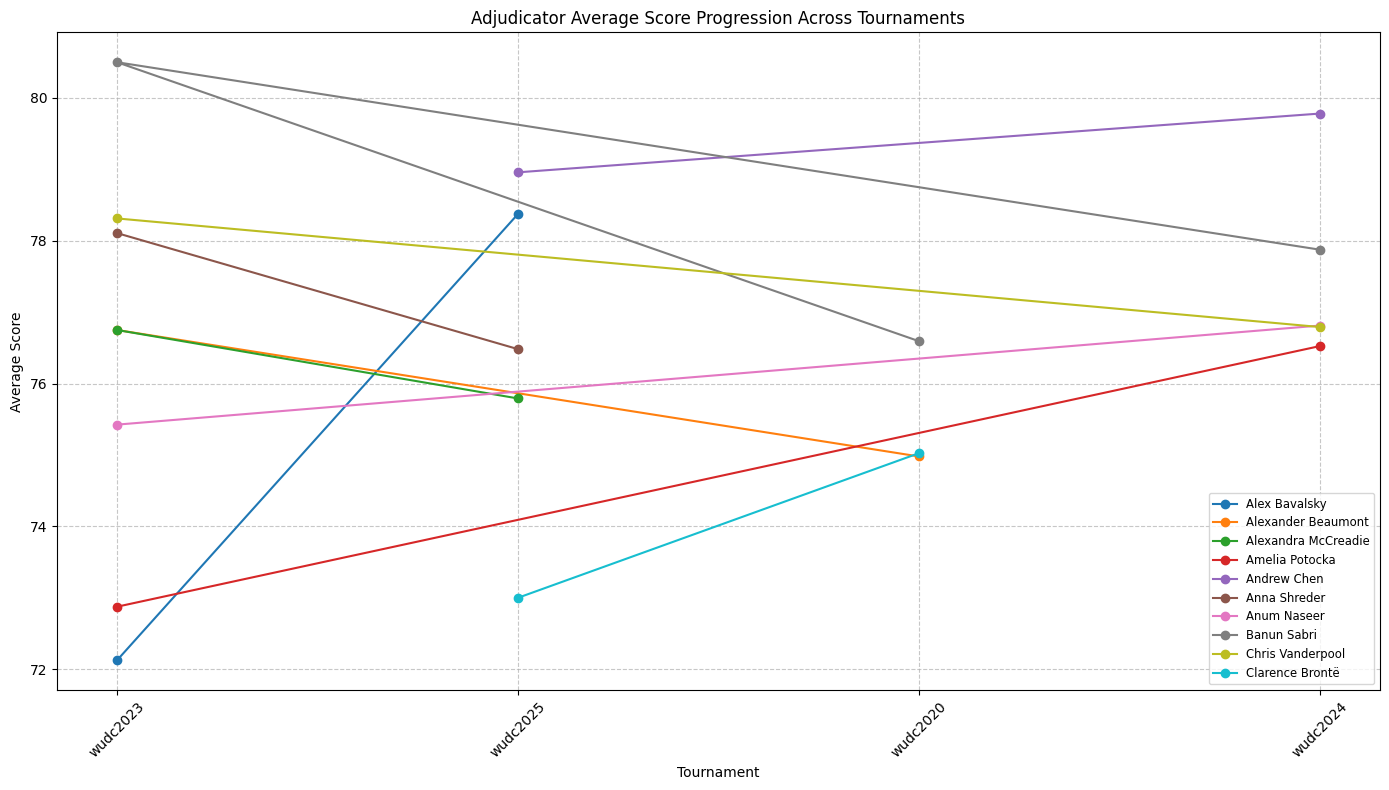

In [127]:
# Get the data for judge scores across tournaments
adj_data = df.groupby(['tournament', 'adj'], sort=True)['score'].mean().reset_index()

# Filter to judges who participated in at least 2 tournaments 
adj_counts = adj_data.groupby('adj')['tournament'].count()
multiple_tournament_judges = adj_counts[adj_counts >= 2].index.tolist()

# Filter the data to only these judges
filtered_adj_data = adj_data[adj_data['adj'].isin(multiple_tournament_judges)]

# Create a line plot
plt.figure(figsize=(14, 8))

# Plot each judge's progression
for judge in multiple_tournament_judges[:10]: 
    judge_tournaments = filtered_adj_data[filtered_adj_data['adj'] == judge]
    # Sort the judge's data by tournament name
    plt.plot(judge_tournaments['tournament'], judge_tournaments['score'], marker='o', linestyle='-', label=judge)

plt.title("Adjudicator Average Score Progression Across Tournaments")
plt.xlabel("Tournament")
plt.ylabel("Average Score")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='best', fontsize='small')
    
plt.tight_layout()
plt.show()


### Scores by speaker across judges

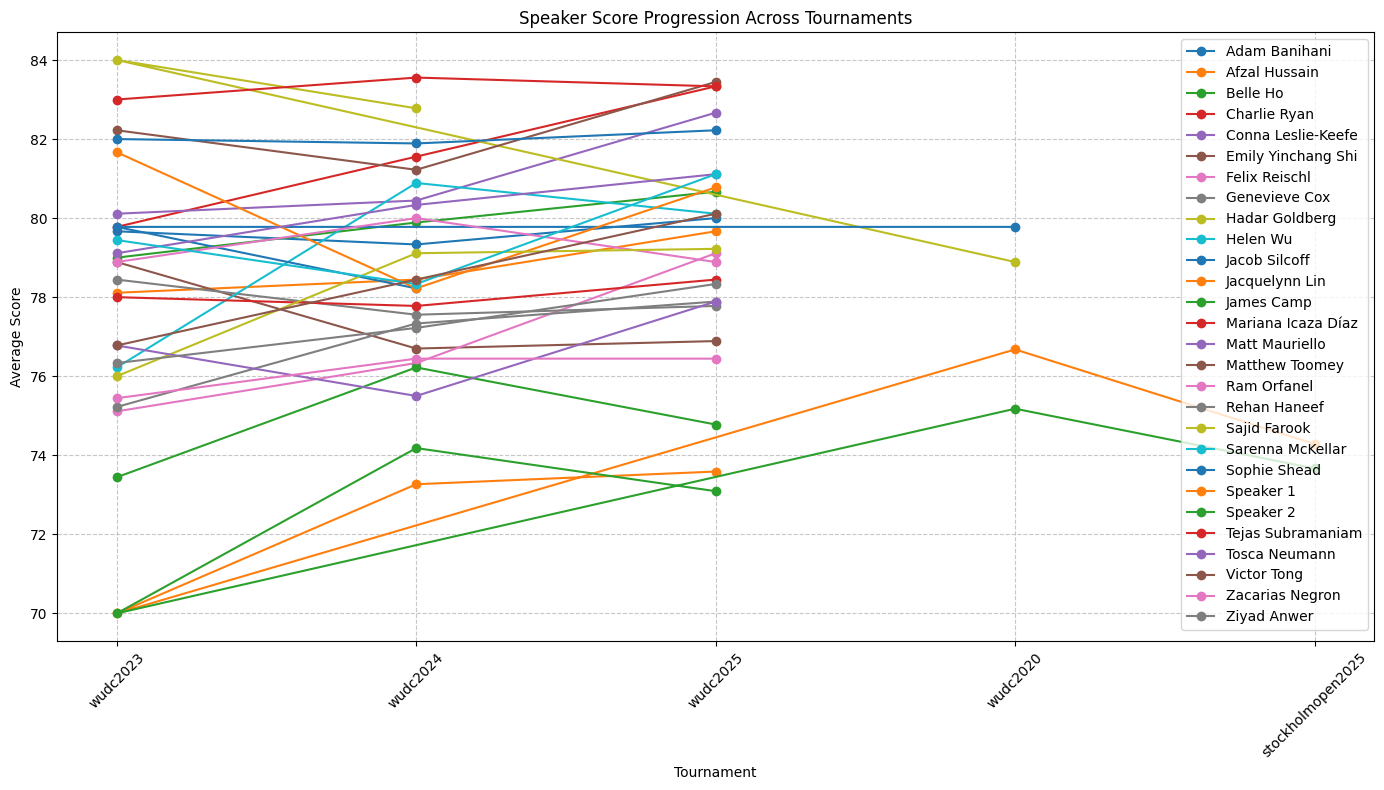

In [130]:
# Get the data for speakers who participated in multiple tournaments
speaker_data = df.groupby(['speaker', 'tournament'])['score'].mean().reset_index()

# Filter to speakers who participated in at least 2 tournaments
speaker_counts = speaker_data.groupby('speaker')['tournament'].count()
multiple_tournament_speakers = speaker_counts[speaker_counts >= 3].index.tolist()

# Filter the data to only these speakers
filtered_data = speaker_data[speaker_data['speaker'].isin(multiple_tournament_speakers)]

# Create a line plot
plt.figure(figsize=(14, 8))

# Get unique tournaments for x-axis ordering
tournaments = df['tournament'].unique()

# Plot each speaker's progression
for speaker in multiple_tournament_speakers:
    speaker_tournaments = filtered_data[filtered_data['speaker'] == speaker]
    plt.plot(speaker_tournaments['tournament'], speaker_tournaments['score'], marker='o', label=speaker)

plt.title("Speaker Score Progression Across Tournaments")
plt.xlabel("Tournament")
plt.ylabel("Average Score")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# If there are too many speakers, don't show the legend
plt.legend(loc='best')
    
plt.tight_layout()
plt.show()